In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00
  Attempti

In [2]:
import pandas as pd
df = pd.read_csv("/content/IMDB Dataset.csv")

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,0
review,0
sentiment,0


In [4]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


::# Dataset Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

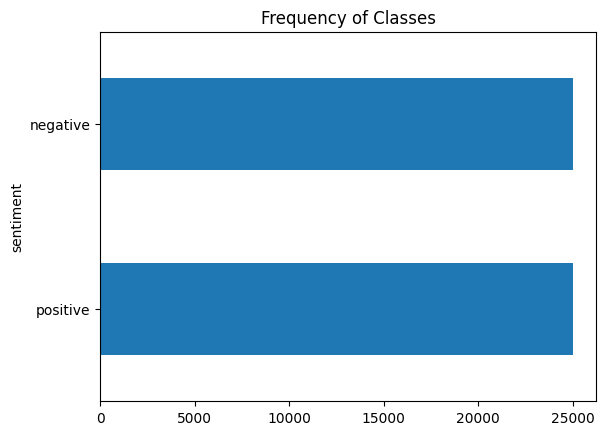

In [6]:
label_counts = df['sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

<Axes: title={'center': 'Words per review'}, xlabel='sentiment'>

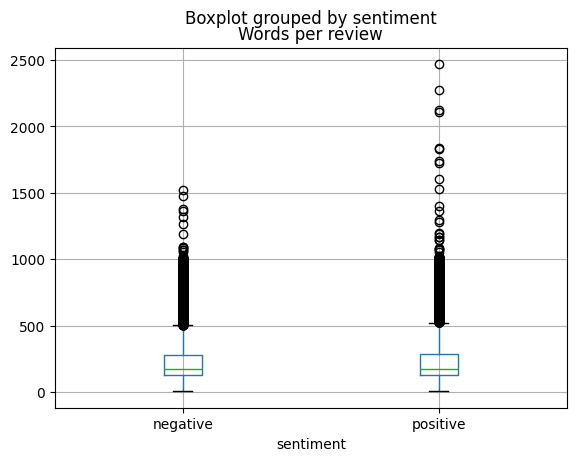

In [7]:
df['Words per review'] = df['review'].str.split().apply(len)
df.boxplot("Words per review", by="sentiment")

#Text to Token Conversion

In [8]:
from transformers import AutoTokenizer

In [9]:
model_ckpt = "distilbert-base-uncased"  #ENGLISH english
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [10]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

# Data Loader and Train Test Split

In [11]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])
train.shape, test.shape, validation.shape

((35000, 3), (10000, 3), (5000, 3))

In [12]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [13]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment', 'Words per review'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['review', 'sentiment', 'Words per review'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['review', 'sentiment', 'Words per review'],
        num_rows: 5000
    })
})

#Tokenization of emotion/sentiment data

In [14]:
dataset['train'][0]

{'review': "I am a guy, so i was very hesitant to watch the movie because i know that Richard Gear likes to be in tear jerker movies. I would rather watch action/adventure/sci fi. I was right, the movie is definitely a tear jerker. Diane tended to over act a few times, as did richard, but they brought it around and made it work. The daughter was a suppressed teen with huge attitude, so you started out hating her. The movie is way too predictable, but for entertainment purposes, it was a masterpiece. Go rent it, see if you don't shed a tear.lol If you like the notebook, you will love this one. The beach scenes were immaculately shot. even though the hurricane scenes were a little off sequence, it was still a bit panicy to watch them react to it.",
 'sentiment': 'positive',
 'Words per review': 139}

In [15]:
def create_label(example):
    example['label'] = 1 if example['sentiment'] == 'positive' else 0
    return example

dataset = dataset.map(create_label)
def tokenize(batch):
    temp = tokenizer(batch['review'], padding=True, truncation=True, return_token_type_ids=True)
    # Include labels in the tokenizer output
    temp['labels'] = batch['label']
    return temp

print(tokenize(dataset['train'][:2]))

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

{'input_ids': [[101, 1045, 2572, 1037, 3124, 1010, 2061, 1045, 2001, 2200, 20221, 2000, 3422, 1996, 3185, 2138, 1045, 2113, 2008, 2957, 6718, 7777, 2000, 2022, 1999, 7697, 12181, 2121, 5691, 1012, 1045, 2052, 2738, 3422, 2895, 1013, 6172, 1013, 16596, 10882, 1012, 1045, 2001, 2157, 1010, 1996, 3185, 2003, 5791, 1037, 7697, 12181, 2121, 1012, 12082, 11121, 2000, 2058, 2552, 1037, 2261, 2335, 1010, 2004, 2106, 2957, 1010, 2021, 2027, 2716, 2009, 2105, 1998, 2081, 2009, 2147, 1012, 1996, 2684, 2001, 1037, 13712, 9458, 2007, 4121, 7729, 1010, 2061, 2017, 2318, 2041, 22650, 2014, 1012, 1996, 3185, 2003, 2126, 2205, 21425, 1010, 2021, 2005, 4024, 5682, 1010, 2009, 2001, 1037, 17743, 1012, 2175, 9278, 2009, 1010, 2156, 2065, 2017, 2123, 1005, 1056, 8328, 1037, 7697, 1012, 8840, 2140, 2065, 2017, 2066, 1996, 14960, 1010, 2017, 2097, 2293, 2023, 2028, 1012, 1996, 3509, 5019, 2020, 19532, 2135, 2915, 1012, 2130, 2295, 1996, 7064, 5019, 2020, 1037, 2210, 2125, 5537, 1010, 2009, 2001, 2145, 1037, 

In [16]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [17]:

label2id = {x['sentiment']:x['label'] for x in dataset ['train']}
id2label = {v:k for k,v in label2id.items()}
label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

#Model Building

In [18]:
from transformers import AutoModel
import torch

In [19]:
# model= AutoModel.from_pretrained(model_ckpt)

In [20]:
# model

In [21]:
# model.config
# model_two="bert-base-cased"

In [22]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
device


device(type='cuda')

In [24]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [25]:
from transformers import TrainingArguments

batch_size=8
training_dir = "bert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False
    )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [26]:
# ! pip install evaluate

other than the above method, you can also use sklearn to calc accuracy

In [27]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#Build Model and Trainer

In [28]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-28-33f6366eb464>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [29]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.245700,0.208654,0.933200,0.933188
2,0.154100,0.258969,0.940200,0.940199


TrainOutput(global_step=8750, training_loss=0.21866175798688617, metrics={'train_runtime': 3882.3631, 'train_samples_per_second': 18.03, 'train_steps_per_second': 2.254, 'total_flos': 9272717905920000.0, 'train_loss': 0.21866175798688617, 'epoch': 2.0})

In [30]:
preds_output = trainer.predict(emotion_encoded[ 'test'])
preds_output.metrics

{'test_loss': 0.2873438894748688,
 'test_accuracy': 0.9343,
 'test_f1': 0.9342919041055048,
 'test_runtime': 142.2977,
 'test_samples_per_second': 70.275,
 'test_steps_per_second': 8.784}

In [31]:
preds_output.predictions

array([[ 3.3293805, -3.6116276],
       [-3.2463808,  3.461626 ],
       [-3.2321262,  3.4359756],
       ...,
       [-3.4272845,  3.6808388],
       [-2.8975363,  3.1845212],
       [-3.1483173,  3.3978598]], dtype=float32)

In [32]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5000
           1       0.92      0.95      0.94      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



#Build Prediction function and save model

In [34]:
text = "I am super happy today. I got it done. Finally!!"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text)

'positive'

In [35]:
trainer.save_model("bertsentimentmodel")

In [36]:

from transformers import pipeline
classifier = pipeline('text-classification', model= 'bertsentimentmodel')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9975307583808899},
 {'label': 'positive', 'score': 0.9961987137794495},
 {'label': 'positive', 'score': 0.9856459498405457},
 {'label': 'negative', 'score': 0.6137743592262268}]

In [37]:

!pip install gradio
import gradio as gr
from transformers import pipeline

classifier = pipeline('text-classification', model='bertsentimentmodel')

def predict_sentiment(text):
    result = classifier(text)[0]
    label = result['label']
    score = result['score']
    return f"{label} (Confidence: {score:.2f})"

iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="Enter Text"),
    outputs=gr.Textbox(label="Sentiment"),
    title="BERT Sentiment Analysis",
    description="Enter text to get its sentiment (positive or negative)."
)

iface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


Device set to use cuda:0


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c06fd46553e4f3cfcc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
